In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


# Cleaning Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [ ]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [ ]:
# cek nan di setiap kolom df
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [ ]:
# rename nama kolom
df.rename(columns={'borough':'city','major_category':'big_crime','minor_category':'small_crime'},inplace=True)
df.head(3)

,lsoa_code,city,big_crime,small_crime,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5


In [ ]:
# Mengonversi kolom "year" dan "month" menjadi tipe data tanggal dengan tanggal 1
df['date'] = pd.to_datetime(
    df['year'].astype(int).astype(str) + '-'
    + df['month'].astype(int).astype(str)
    + '-1', format='%Y-%m-%d')
# Mengonversi kolom "date" ke format bulan-tahun
df['date'] = df['date'].dt.strftime('%Y-%m')
df.head()

,lsoa_code,city,big_crime,small_crime,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06


# Ploting


In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use("ggplot")

## Line Plot


In [ ]:
df_crime_rates = df[['value','year']].sort_values(by='year',ascending=True)
df_crime_rates


,value,year
12504370,0,2008
5807276,0,2008
5807272,0,2008
8512153,0,2008
5807264,0,2008
...,...,...
6171475,1,2016
6171480,0,2016
11948556,0,2016
6171412,0,2016


In [ ]:
df_crime_years= df_crime_rates.groupby('year')['value'].sum().reset_index()
df_crime_years.set_index('year',inplace= True)
df_crime_years

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


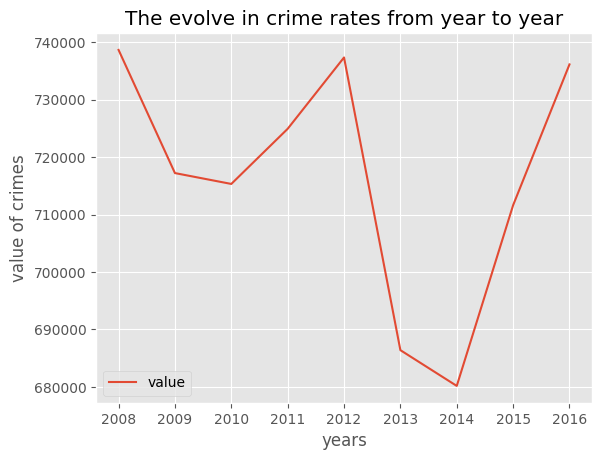

In [ ]:
df_crime_years.plot()
plt.title('The evolve in crime rates from year to year')
plt.ylabel('value of crimes')
plt.xlabel('years')
plt.show()

# menampilkan tingkat perkembangan kejahatan daritahun 2008 sampai 2016

### Area Plot


In [ ]:
df.head(3)

,lsoa_code,city,big_crime,small_crime,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05


In [ ]:
df.big_crime.nunique()

9

In [ ]:
df_big_crime = pd.pivot_table(df, values='value', index='year', columns='big_crime', aggfunc='sum')
df_big_crime


big_crime,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


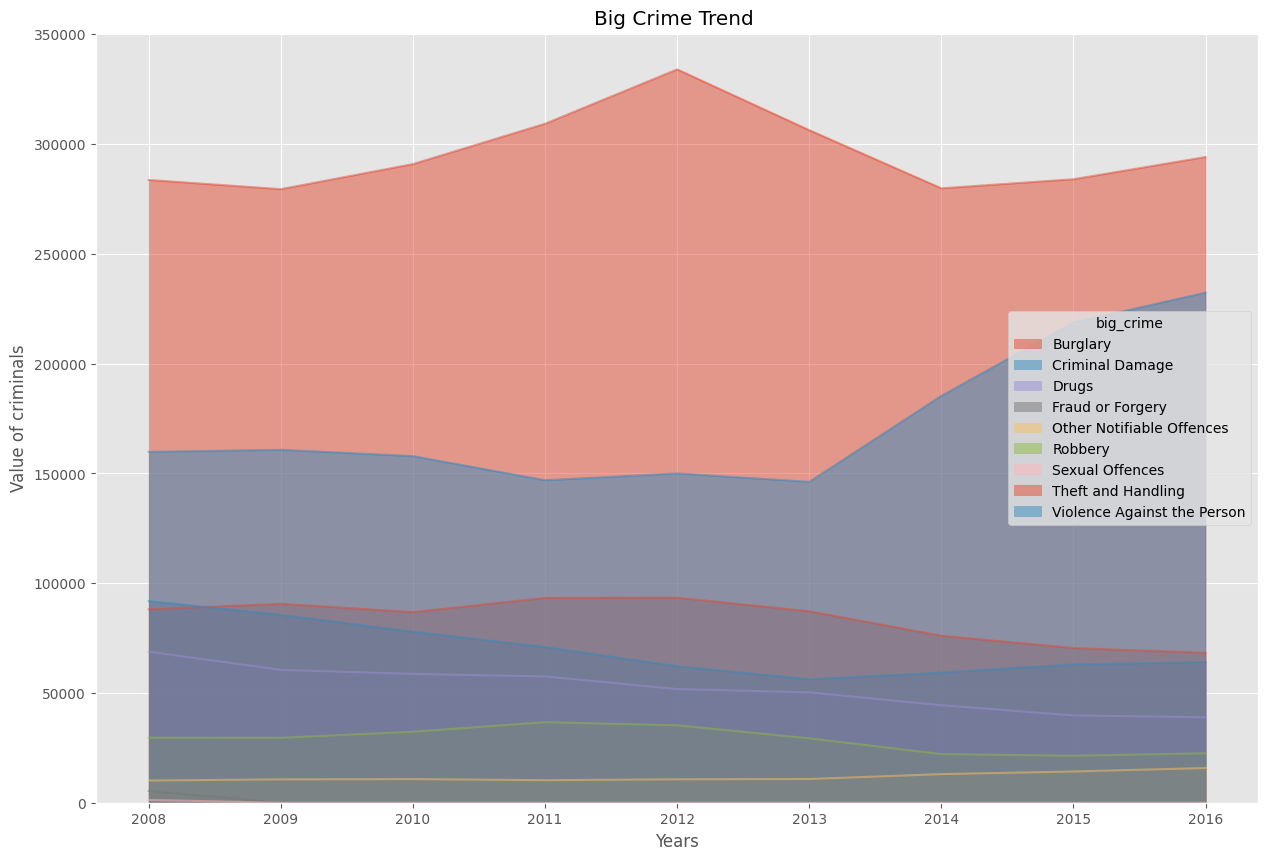

In [ ]:
df_big_crime.plot(kind= 'area',
                    stacked = False,
                    figsize = (15,10),

                    )
plt.title('Big Crime Trend ')
plt.ylabel('Value of criminals')
plt.xlabel('Years')

plt.show()

### Bar Chart

In [ ]:
df.head(2)

,lsoa_code,city,big_crime,small_crime,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11


In [ ]:
df_city = df[['city','value']].sort_values(by='city',ascending=True)
df_city.head(2)

,city,value
6308463,Barking and Dagenham,0
1844927,Barking and Dagenham,0


In [ ]:
df_city_total= df_city.groupby('city')['value'].sum().reset_index()
df_city_total.set_index('city',inplace= True)
df_city_total

,value
city,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


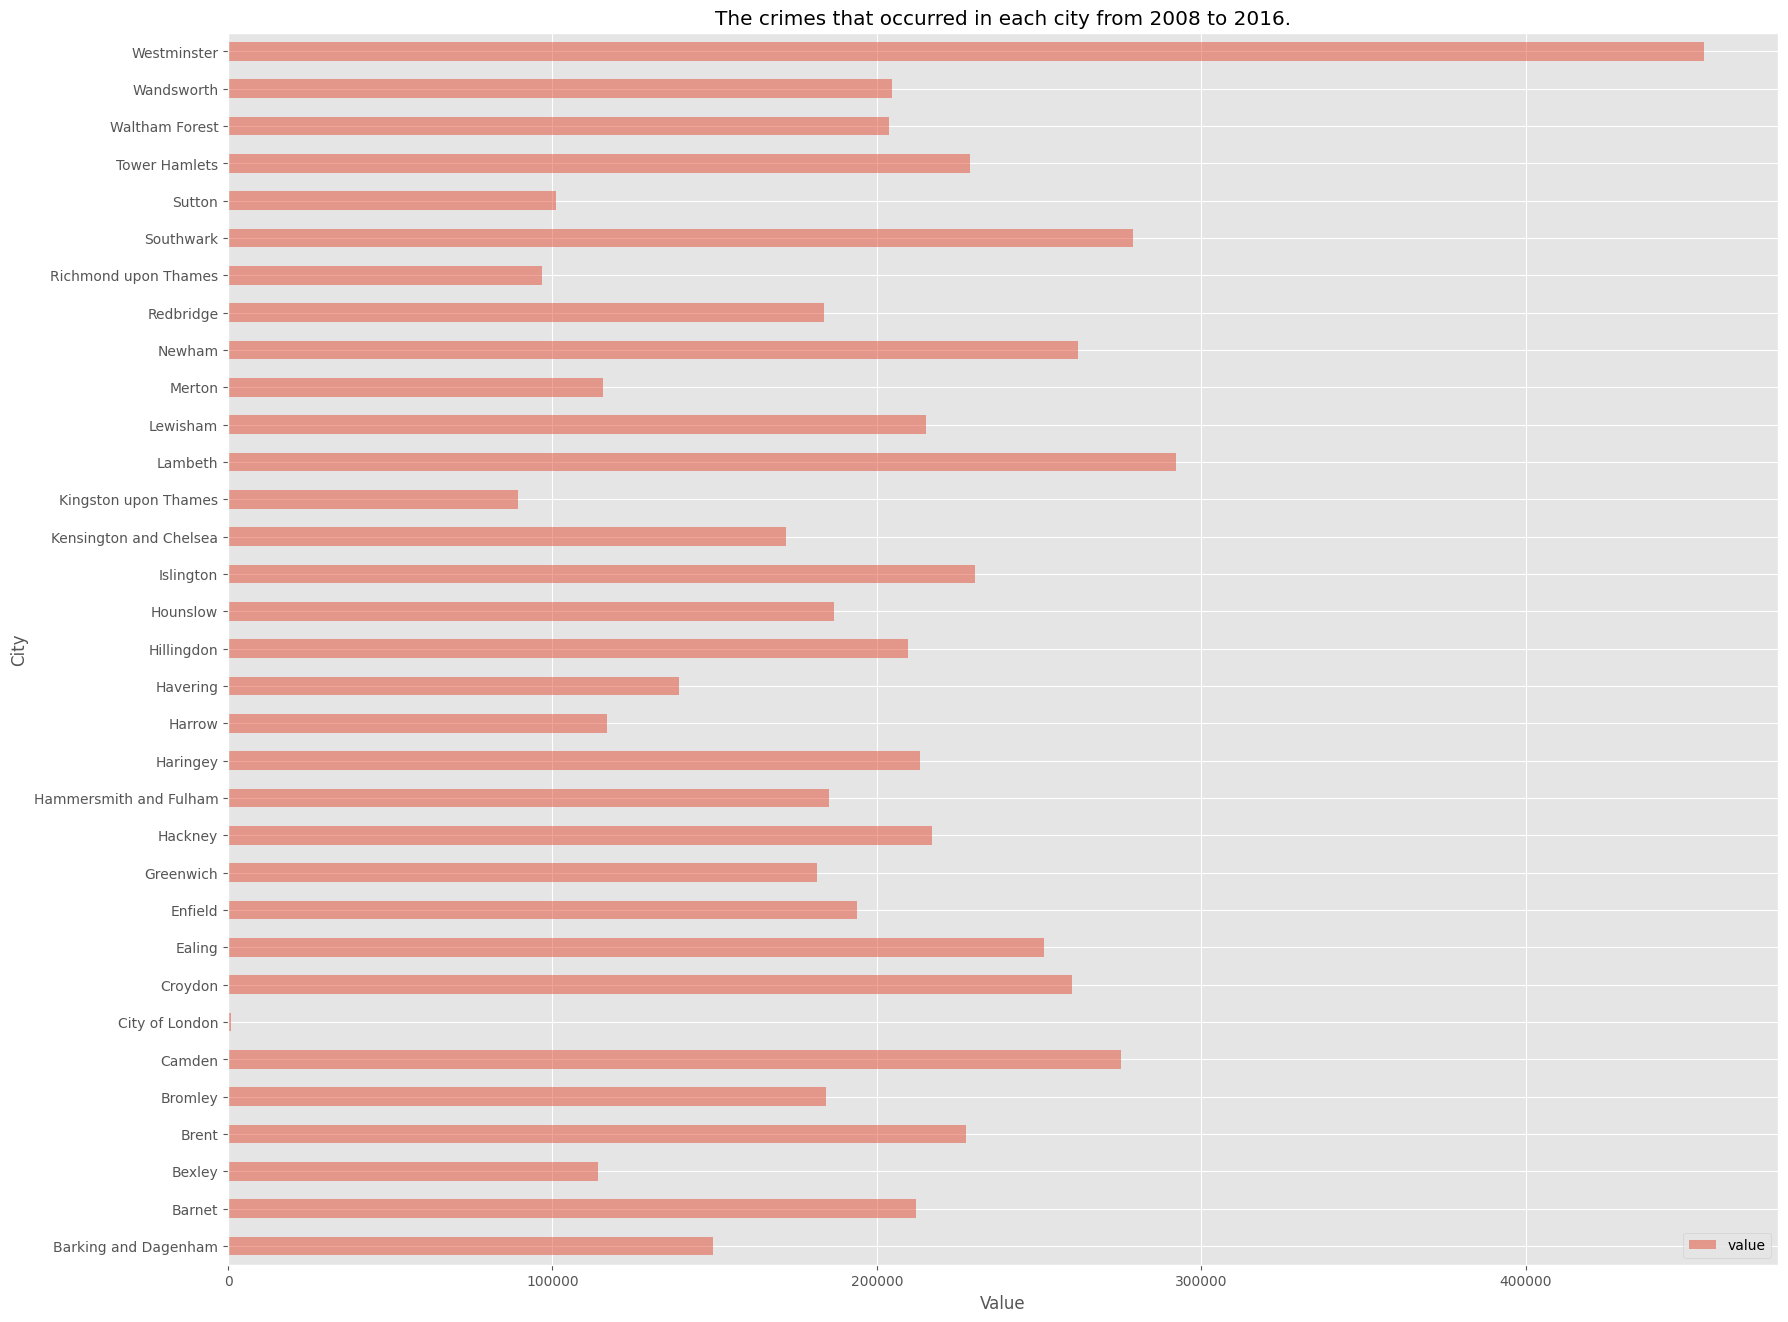

In [ ]:
df_city_total.plot(kind='barh',
          figsize=(20, 16),
          stacked=False,
          alpha= 0.5
         )

plt.title('The crimes that occurred in each city from 2008 to 2016.')
plt.ylabel('City')
plt.xlabel('Value')
plt.show()

### Histogram

In [ ]:
df.head(2)

,lsoa_code,city,big_crime,small_crime,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11


In [ ]:
crime_counts = df['big_crime'].value_counts()
df_top3 = crime_counts.head(3).index
df_top3

Index(['Theft and Handling', 'Violence Against the Person', 'Criminal Damage'], dtype='object')

In [ ]:
df_top_crime = pd.pivot_table(df[df['big_crime'].isin(df_top3)],
                               values='value',
                               index='year',
                               columns='big_crime',
                               aggfunc='sum')
df_top_crime


big_crime,Criminal Damage,Theft and Handling,Violence Against the Person
year,,,
2008,91872,283692,159844
2009,85565,279492,160777
2010,77897,290924,157894
2011,70914,309292,146901
2012,62158,334054,150014
2013,56206,306372,146181
2014,59279,279880,185349
2015,62976,284022,218740
2016,64071,294133,232381


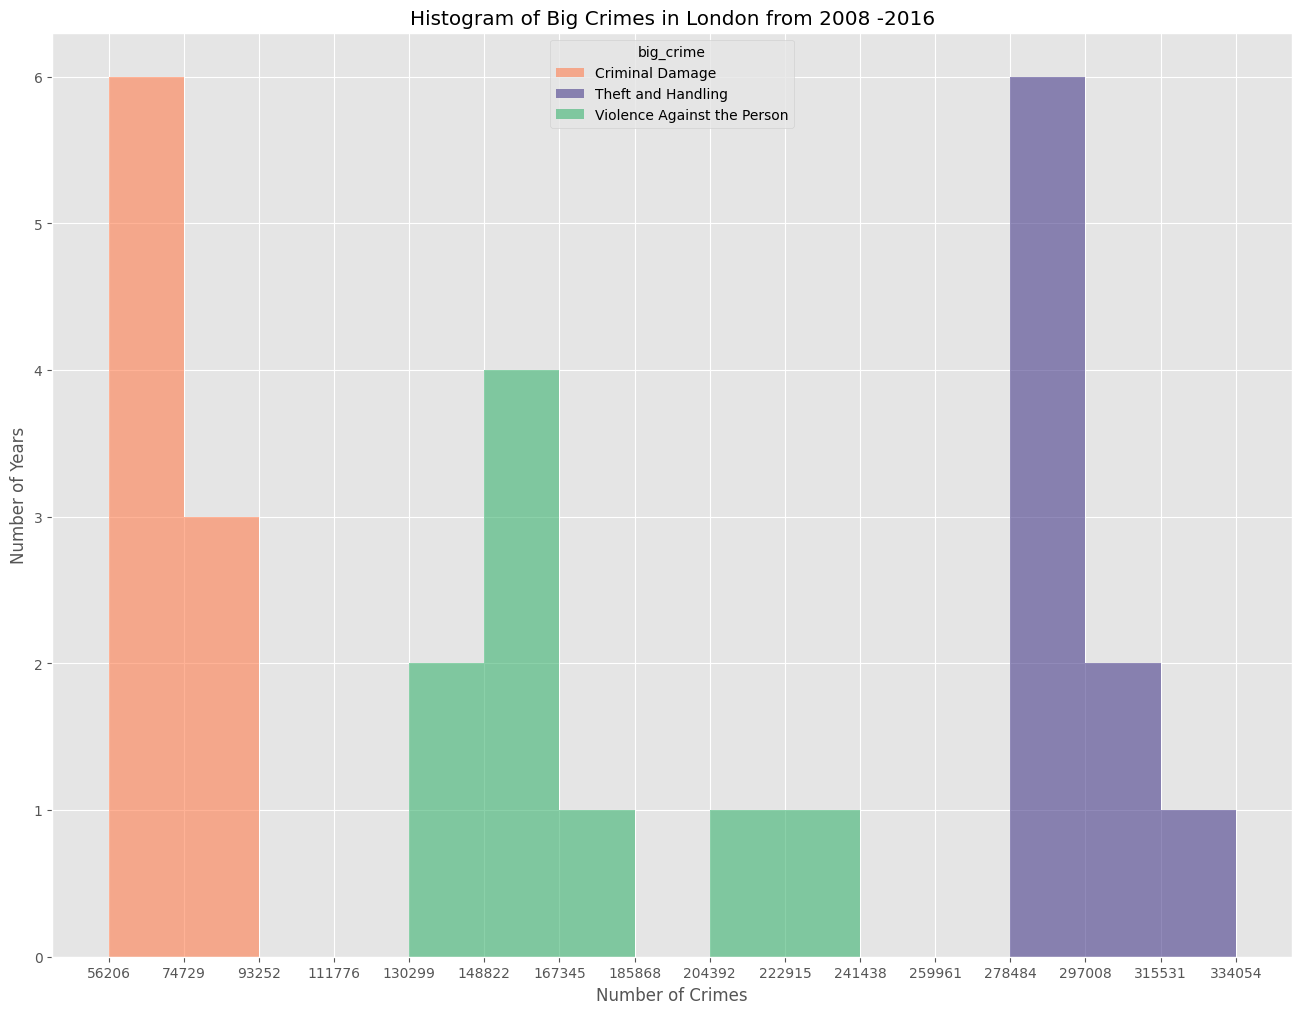

In [ ]:
count, bin_edges = np.histogram(df_top_crime, 15)
df_top_crime.plot(kind ='hist',
          figsize=(16,12),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Big Crimes in London from 2008 -2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Crimes')

plt.show()

### Pie Chart

In [ ]:
 crime_counts

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: big_crime, dtype: int64

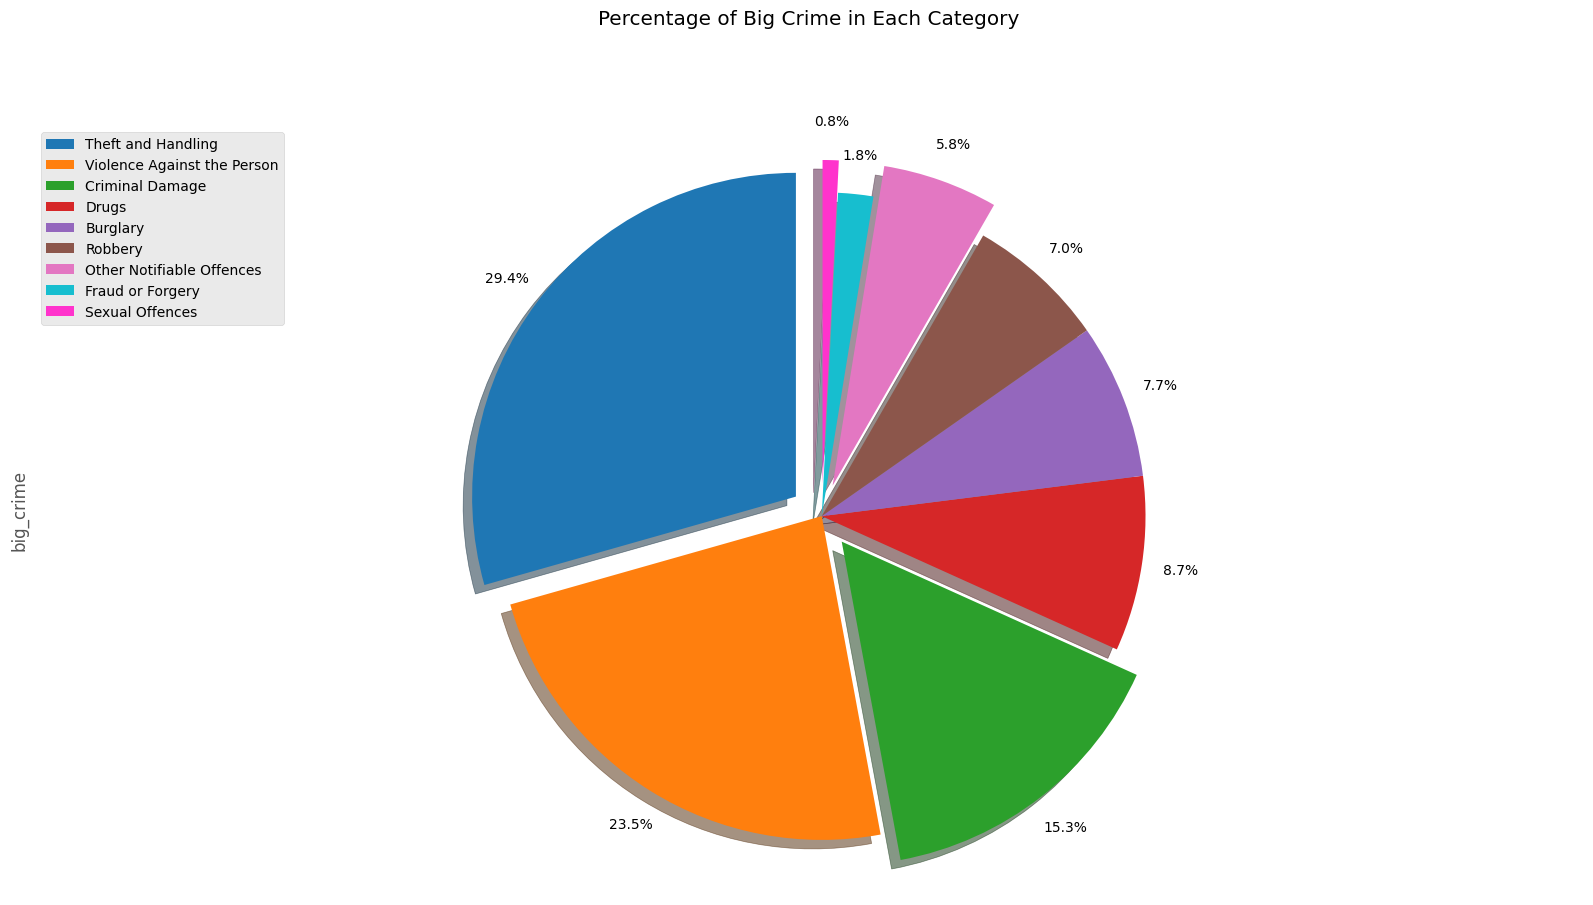

In [ ]:
explode_list = [0.1, 0, 0.1, 0, 0, 0, 0.1, 0, 0.1]
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#17becf', '#ff33cc']

crime_counts.plot(  kind='pie',
                    figsize=(20, 10),
                    autopct='%1.1f%%',
                    startangle=90,
                    shadow=True,
                    labels=None,
                    pctdistance=1.12,
                    explode=explode_list,
                    colors= color_list
                )
plt.title('Percentage of Big Crime in Each Category',y=1.12)
plt.axis('equal')
plt.legend(labels=crime_counts.index, loc='upper left')
plt.show()

### Box Plot

In [ ]:
df.head(2)

,lsoa_code,city,big_crime,small_crime,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11


In [ ]:
df_three_years = df[['year','value']].sort_values(by='year',ascending=True)
df_three_years = df_three_years.groupby('year')['value'].sum().reset_index()
df_three_years = df_three_years.head(3)

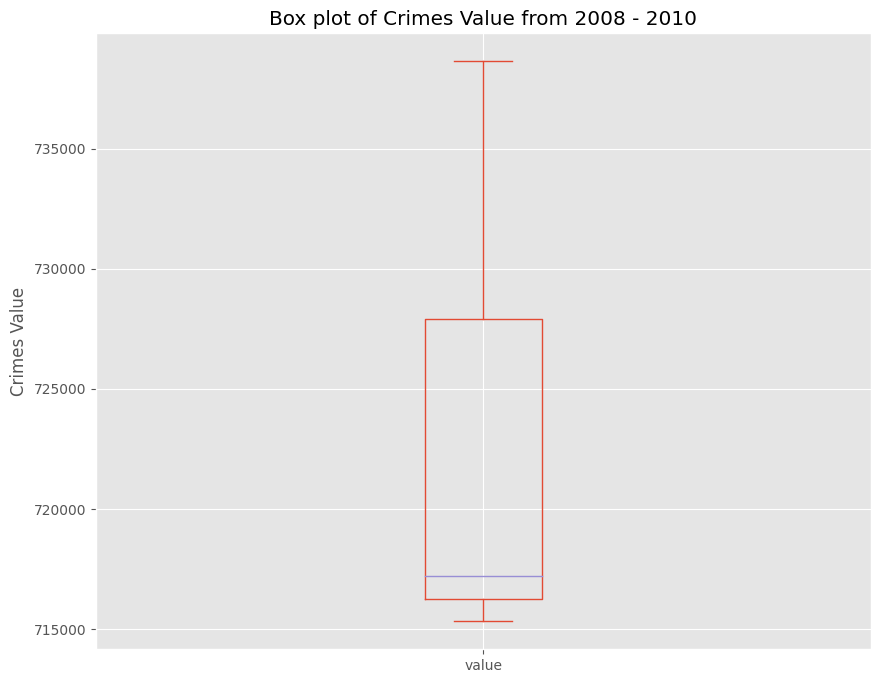

In [ ]:
df_three_years.plot(x='year',kind='box',figsize= (10,8))
plt.title('Box plot of Crimes Value from 2008 - 2010')
plt.ylabel('Crimes Value')

plt.show()

### Scatter Plot

In [ ]:
# scatter kejahatan di koota Croydon pada tahun 2008 - 2016
df_crime_croydon = df.loc[df['city']== 'Croydon'].sort_values(by='year')


In [ ]:
df_crime_croydon

,lsoa_code,city,big_crime,small_crime,value,year,month,date
2709699,E01001027,Croydon,Other Notifiable Offences,Other Notifiable,0,2008,7,2008-07
9184268,E01000981,Croydon,Robbery,Business Property,0,2008,4,2008-04
11820768,E01001011,Croydon,Fraud or Forgery,Counted per Victim,0,2008,6,2008-06
1957576,E01001169,Croydon,Violence Against the Person,Other violence,0,2008,9,2008-09
7557657,E01001052,Croydon,Drugs,Possession Of Drugs,0,2008,7,2008-07
...,...,...,...,...,...,...,...,...
3244250,E01001079,Croydon,Theft and Handling,Theft/Taking of Pedal Cycle,0,2016,5,2016-05
8634716,E01001192,Croydon,Theft and Handling,Handling Stolen Goods,0,2016,7,2016-07
8635016,E01000996,Croydon,Theft and Handling,Other Theft Person,0,2016,3,2016-03
979587,E01001118,Croydon,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,10,2016-10


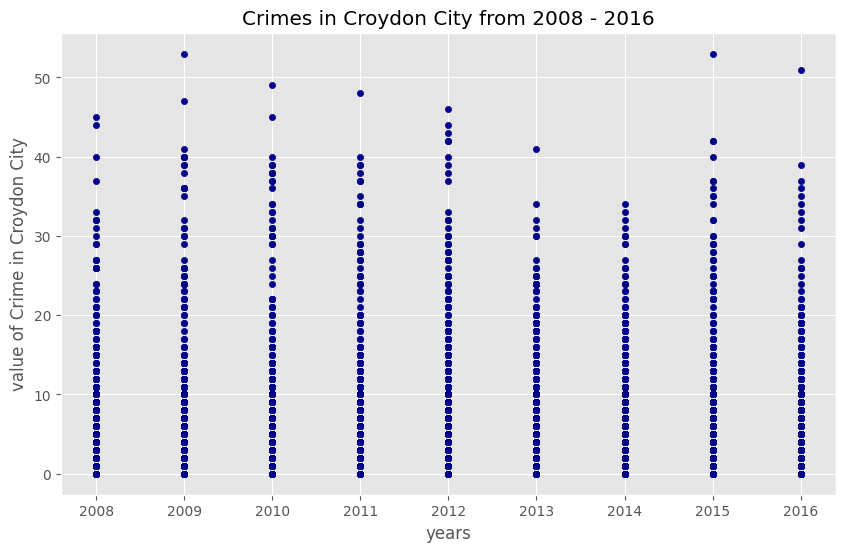

In [ ]:
df_crime_croydon.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='darkblue')
plt.xlabel('years')
plt.ylabel('value of Crime in Croydon City')
plt.title('Crimes in Croydon City from 2008 - 2016')
plt.show()

In [ ]:
croydon_tren = df_crime_croydon[['year','value']]
croydon_tren = croydon_tren.groupby('year')['value'].sum().reset_index()
croydon_tren

,year,value
0,2008,29516
1,2009,29784
2,2010,29373
3,2011,29830
4,2012,30189
5,2013,27444
6,2014,27357
7,2015,28089
8,2016,28712


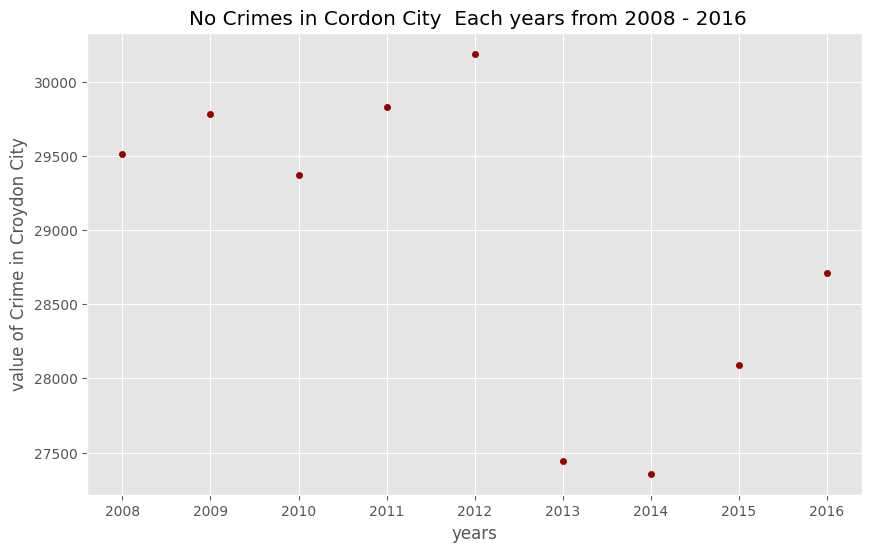

In [ ]:
croydon_tren.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='darkred')
plt.xlabel('years')
plt.ylabel('value of Crime in Croydon City')
plt.title('No Crimes in Cordon City  Each years from 2008 - 2016  ')
plt.show()

### Word Clouds

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


In [ ]:
text = ' '.join(df['small_crime'])
text

In [ ]:
small_crime_df = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords

)
small_crime_df.generate(text)

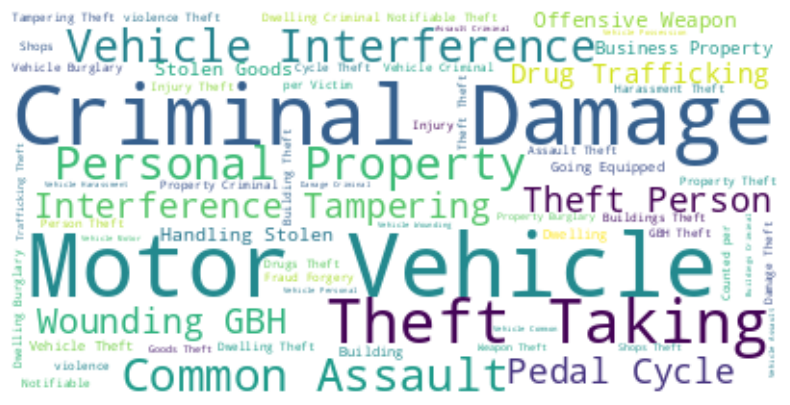

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(small_crime_df, interpolation='bilinear')
plt.axis('off')  # Sembunyikan sumbu
plt.show()

### Folium Maps

In [ ]:
import folium

In [ ]:
df.shape

In [ ]:
limit = 200
df_limit_crime = df.iloc[0:limit,:]
df_limit_crime.shape

In [ ]:
df_limit_crime.big_crime.unique()

In [ ]:
# koordinat kota london
latitude = 51.5074
longitude = 0.1278

In [ ]:

# create map and display it
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
london_map

In [ ]:
from geopy.geocoders import Photon

In [ ]:
# Fungsi untuk mendapatkan koordinat dari nama kota menggunakan Nominatim
geolocator = Photon(user_agent="myGeocoder")

# List untuk menyimpan koordinat
latitudes = []
longitudes = []

In [ ]:
for index, row in df_limit_crime.iterrows():
    city = row['city']
    # Mendapatkan koordinat dari nama borough menggunakan geocoding
    location = geolocator.geocode(city)
    if location:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else:
        latitudes.append(None)
        longitudes.append(None)


# Menambahkan kolom baru 'latitude' dan 'longitude' ke dalam df
df_limit_crime['latitude'] = latitudes
df_limit_crime['longitude'] = longitudes

<ipython-input-53-5cb60562e178>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limit_crime['latitude'] = latitudes
<ipython-input-53-5cb60562e178>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limit_crime['longitude'] = longitudes


In [ ]:
df_limit_crime.head()

,lsoa_code,city,big_crime,small_crime,value,year,month,date,latitude,longitude
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11,51.371305,-0.101957
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11,41.026486,-73.628460
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05,51.402805,0.014814
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03,51.576320,0.045410
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06,51.457027,-0.193261


In [ ]:
crime = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_limit_crime.latitude, df_limit_crime.longitude):
    crime.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
london_map.add_child(crime)